# EDA - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from datetime import datetime

## Loading CSV with Pandas plus 1st look into the data

In [40]:
#use pandas to load and convert the CSV
df = pd.read_csv("AirQualityUCI.csv",sep=";")


In [41]:
#printing the 1st 5 lines of the dataframe
print(df.head())
print(df.shape)

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

We can start by noticing that there 2 columns for date and time, 13 columns for variables, and 2 more for columns called **Unnamed**. We will start by deleting the Unnamed columns.


In [42]:
df = df.drop(columns=["Unnamed: 15","Unnamed: 16"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB
None


According to the dataset source page (http://archive.ics.uci.edu/ml/datasets/Air+Quality#), each of the dataset columns is the following:
1. Date (DD/MM/YYYY)
2. Time (HH.MM.SS)
3. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
4. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
5. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
6. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
7. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
8. True hourly averaged NOx concentration in ppb (reference analyzer)
9. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
10. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
11. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
12. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
13. Temperature in °C
14. Relative Humidity (%)
15. AH Absolute Humidity

We see that there are columns that are of dtype **object** (which means string) when they should be: datetime (for the date) and floats or integers. Otherwise, it's impossible to do mathematical operations with them. We proceed to convert them.

## Dtype Convertion

Above, we saw that all columns are of the dtype object which means they are strings. Before we do anything else we need to convert them all to numbers we can read (floats or integers).

In [43]:
#1st convert data column to datetime object
df["Date"],df["Time"] = pd.to_datetime(df["Date"], format = "%d/%m/%Y" ), pd.to_datetime(df["Time"],format="%H.%M.%S")

df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.').astype(float)
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.').astype(float)
df['T'] = df["T"].str.replace(',', '.').astype(float)
df["RH"] = df["RH"].str.replace(',', '.').astype(float)
df['AH'] = df['AH'].str.replace(',', '.').astype(float)


In [44]:
#check if dtypes are correct now
print(df.head(3))
print(df.info())

        Date                Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10 1900-01-01 18:00:00     2.6       1360.0     150.0      11.9   
1 2004-03-10 1900-01-01 19:00:00     2.0       1292.0     112.0       9.4   
2 2004-03-10 1900-01-01 20:00:00     2.2       1402.0      88.0       9.0   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time         

In [45]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


All seems correct regarding dtypes, number of columns and rows. Just a final check regarding Missing Values and Duplicate Rows before we start looking into the data.

## Final Check - Sorting, Missing, and Duplicate Rows

In [46]:
#be sure the df is sorted by date
df.sort_values(by=["date"])
#be sure there are no days missing
assert df["date"].isnull().sum() == 0

KeyError: 'date'

In [9]:
#delete duplicate rows
print(df.shape)
df.drop_duplicates()
print(df.shape)
#no duplicates if the output shape is the same

(3288, 7)
(3288, 7)


## Data exploration


We are now ready to explore the data: look for patterns, distributions, errors, and quirks in the data.


### Missing Values

<AxesSubplot: >

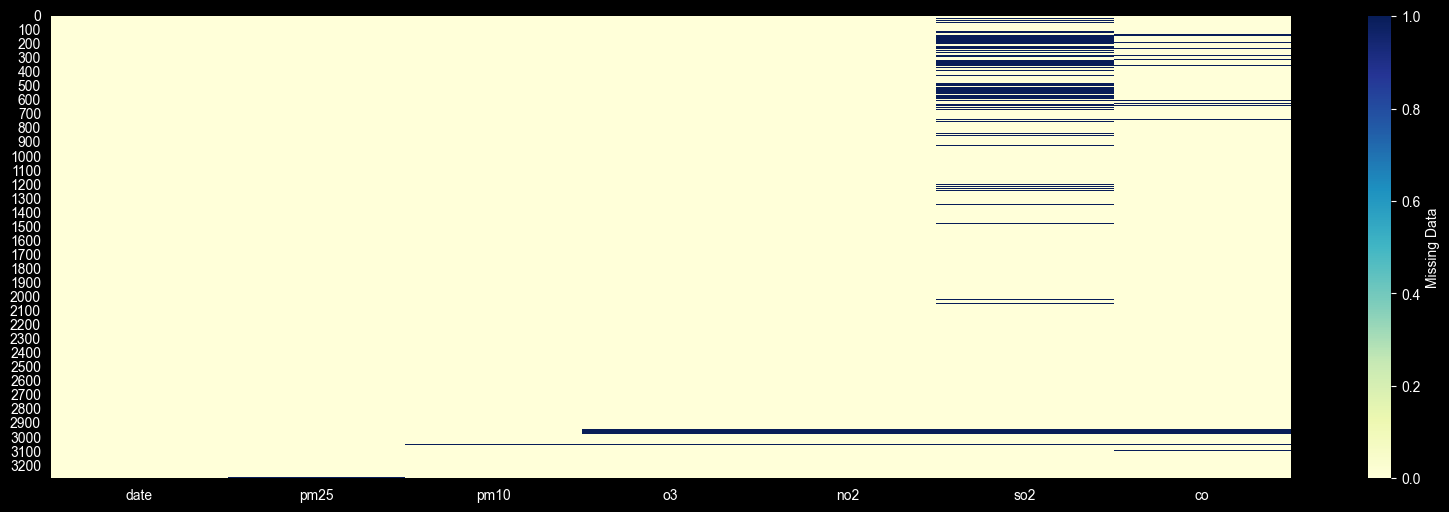

In [10]:
#Checking Missing Values
plt.figure(figsize=(20,6))
sns.heatmap(df.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

The column ***so2*** has many missing values, we will have to be careful with it. There is also some rows (days), when more than one variable is missing, and it seems there is no day missing completely from the data. We will handle missing values when we process the data, for now we are just exploring and *learning* the data.

<Figure size 2000x600 with 0 Axes>

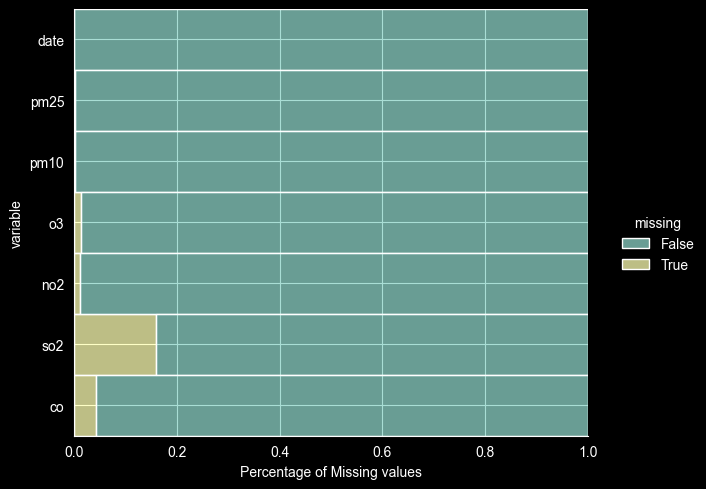

In [11]:
#just one last check to confirm the percentage of missing values for each column
plt.figure(figsize=(20,6))
ax = sns.displot(
data=df.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill",aspect=1.25
)
ax.set(xlabel="Percentage of Missing values")
plt.show()

The ***so2*** column has about 20% missing data, which is problematic. We will probably not use it and discard it in the data transformation phase. This the 1st example of why EDA is important.

### Checking for non-unique entries count

co       18
so2      21
pm10     67
o3       75
no2      81
pm25    139
dtype: int64


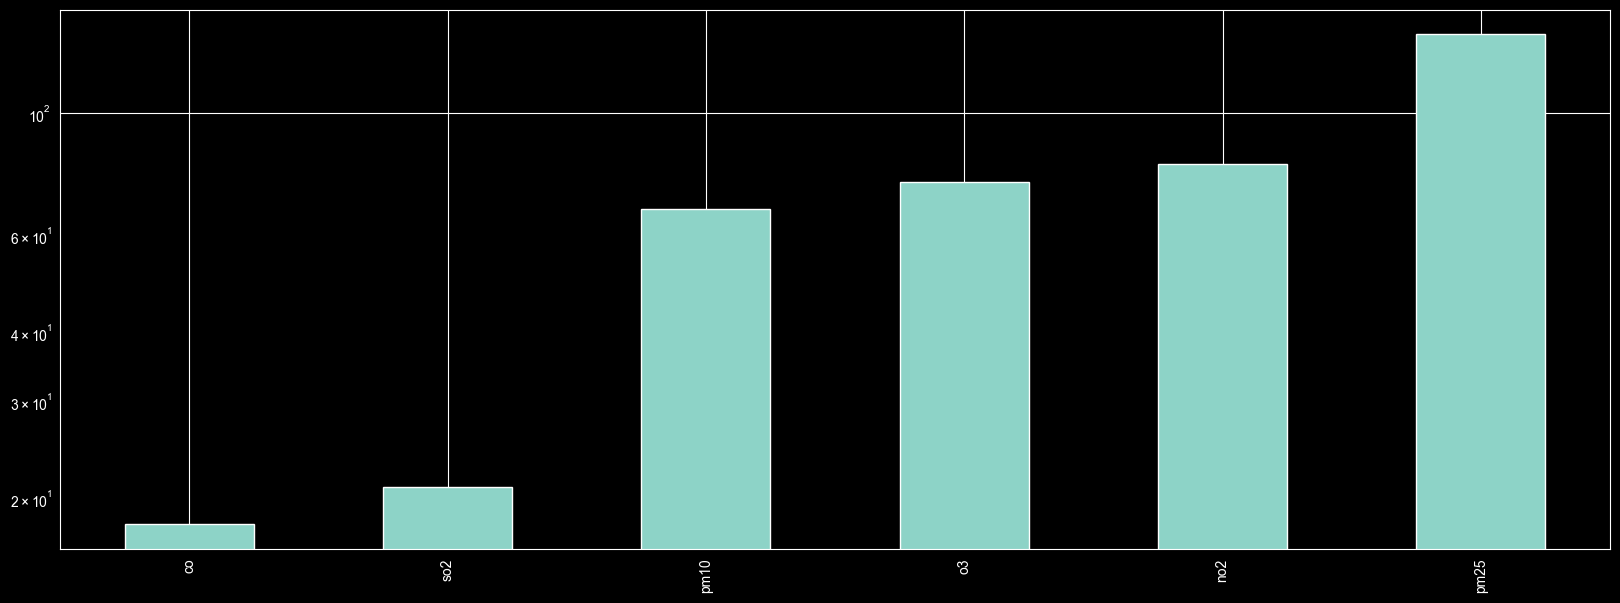

In [12]:
# how many non-unique entries does each column have?
unique_values = df.select_dtypes(include='float64').nunique().sort_values()
print(unique_values)
unique_values.plot(kind="bar",logy=True,figsize=(20,7))
plt.show()

We can see that there are 2 variables (co and so2) with much less non-unique variables than the others. This means that probably the measure of these 2 variables is:
    1. Done with low resolution sensors;
    2. Hard;
    3. Disregarded/ Not important to health factors;

### Variables distributions

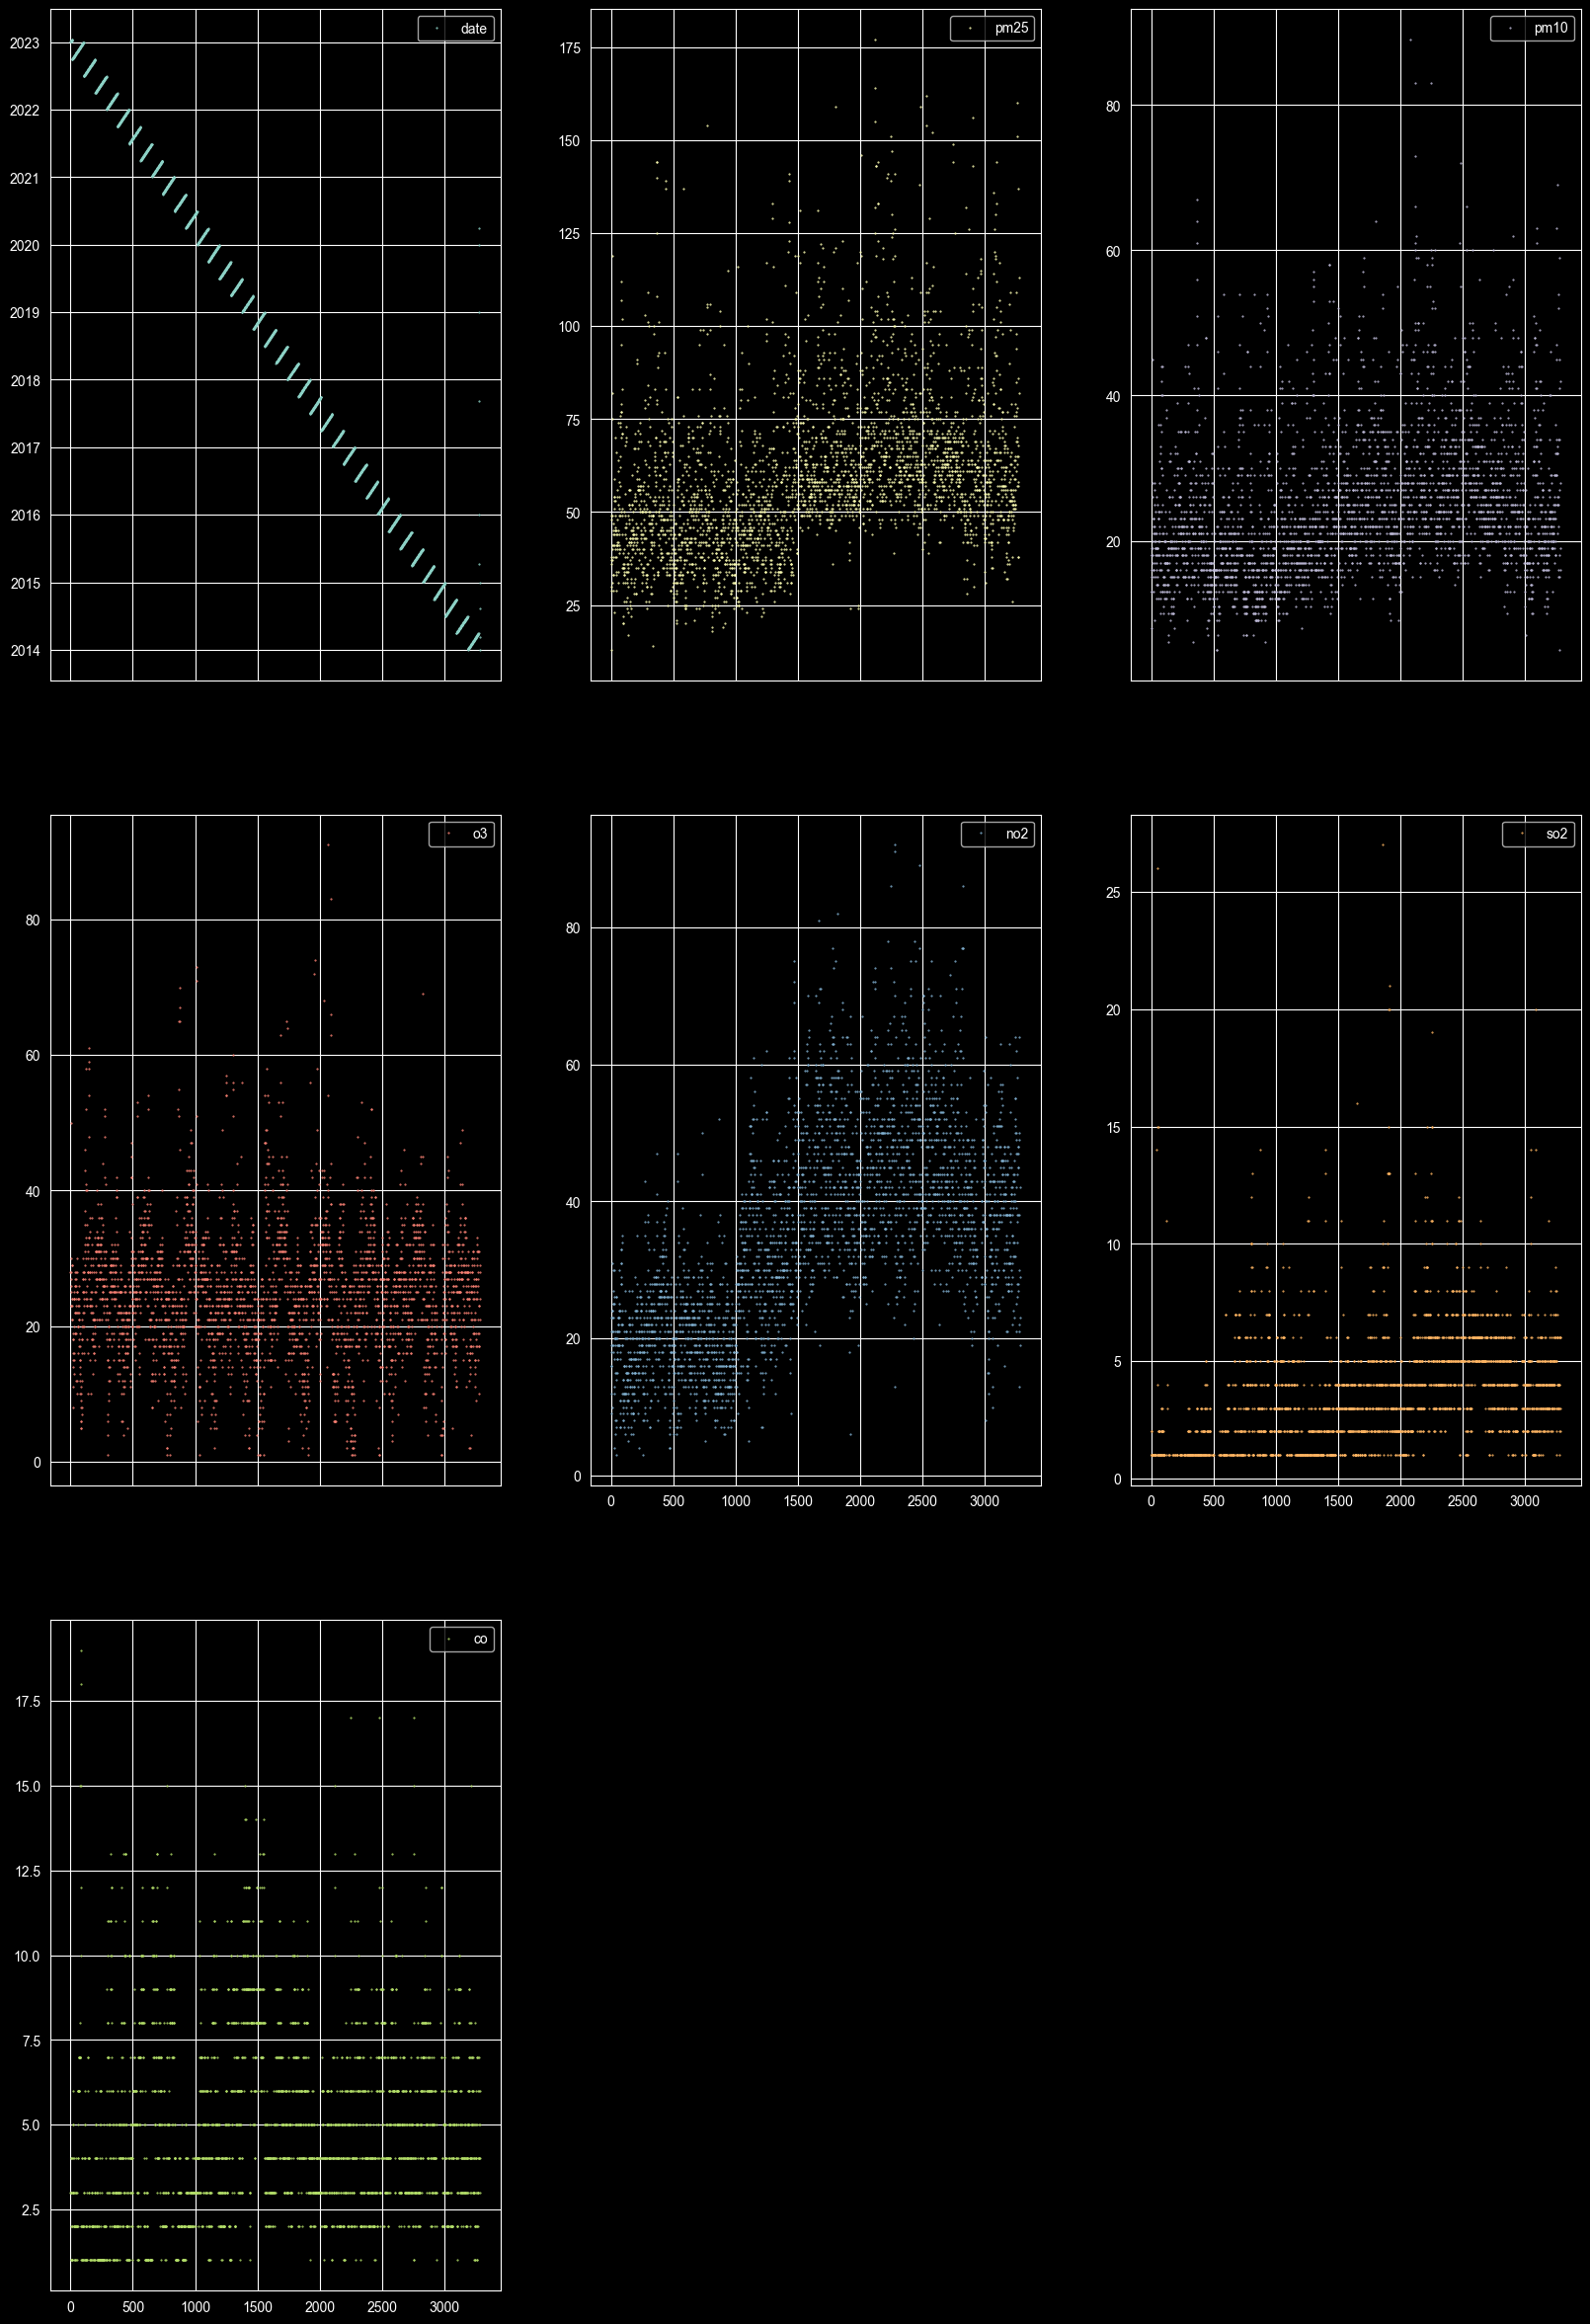

In [13]:

df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(20, 30), markersize=1);


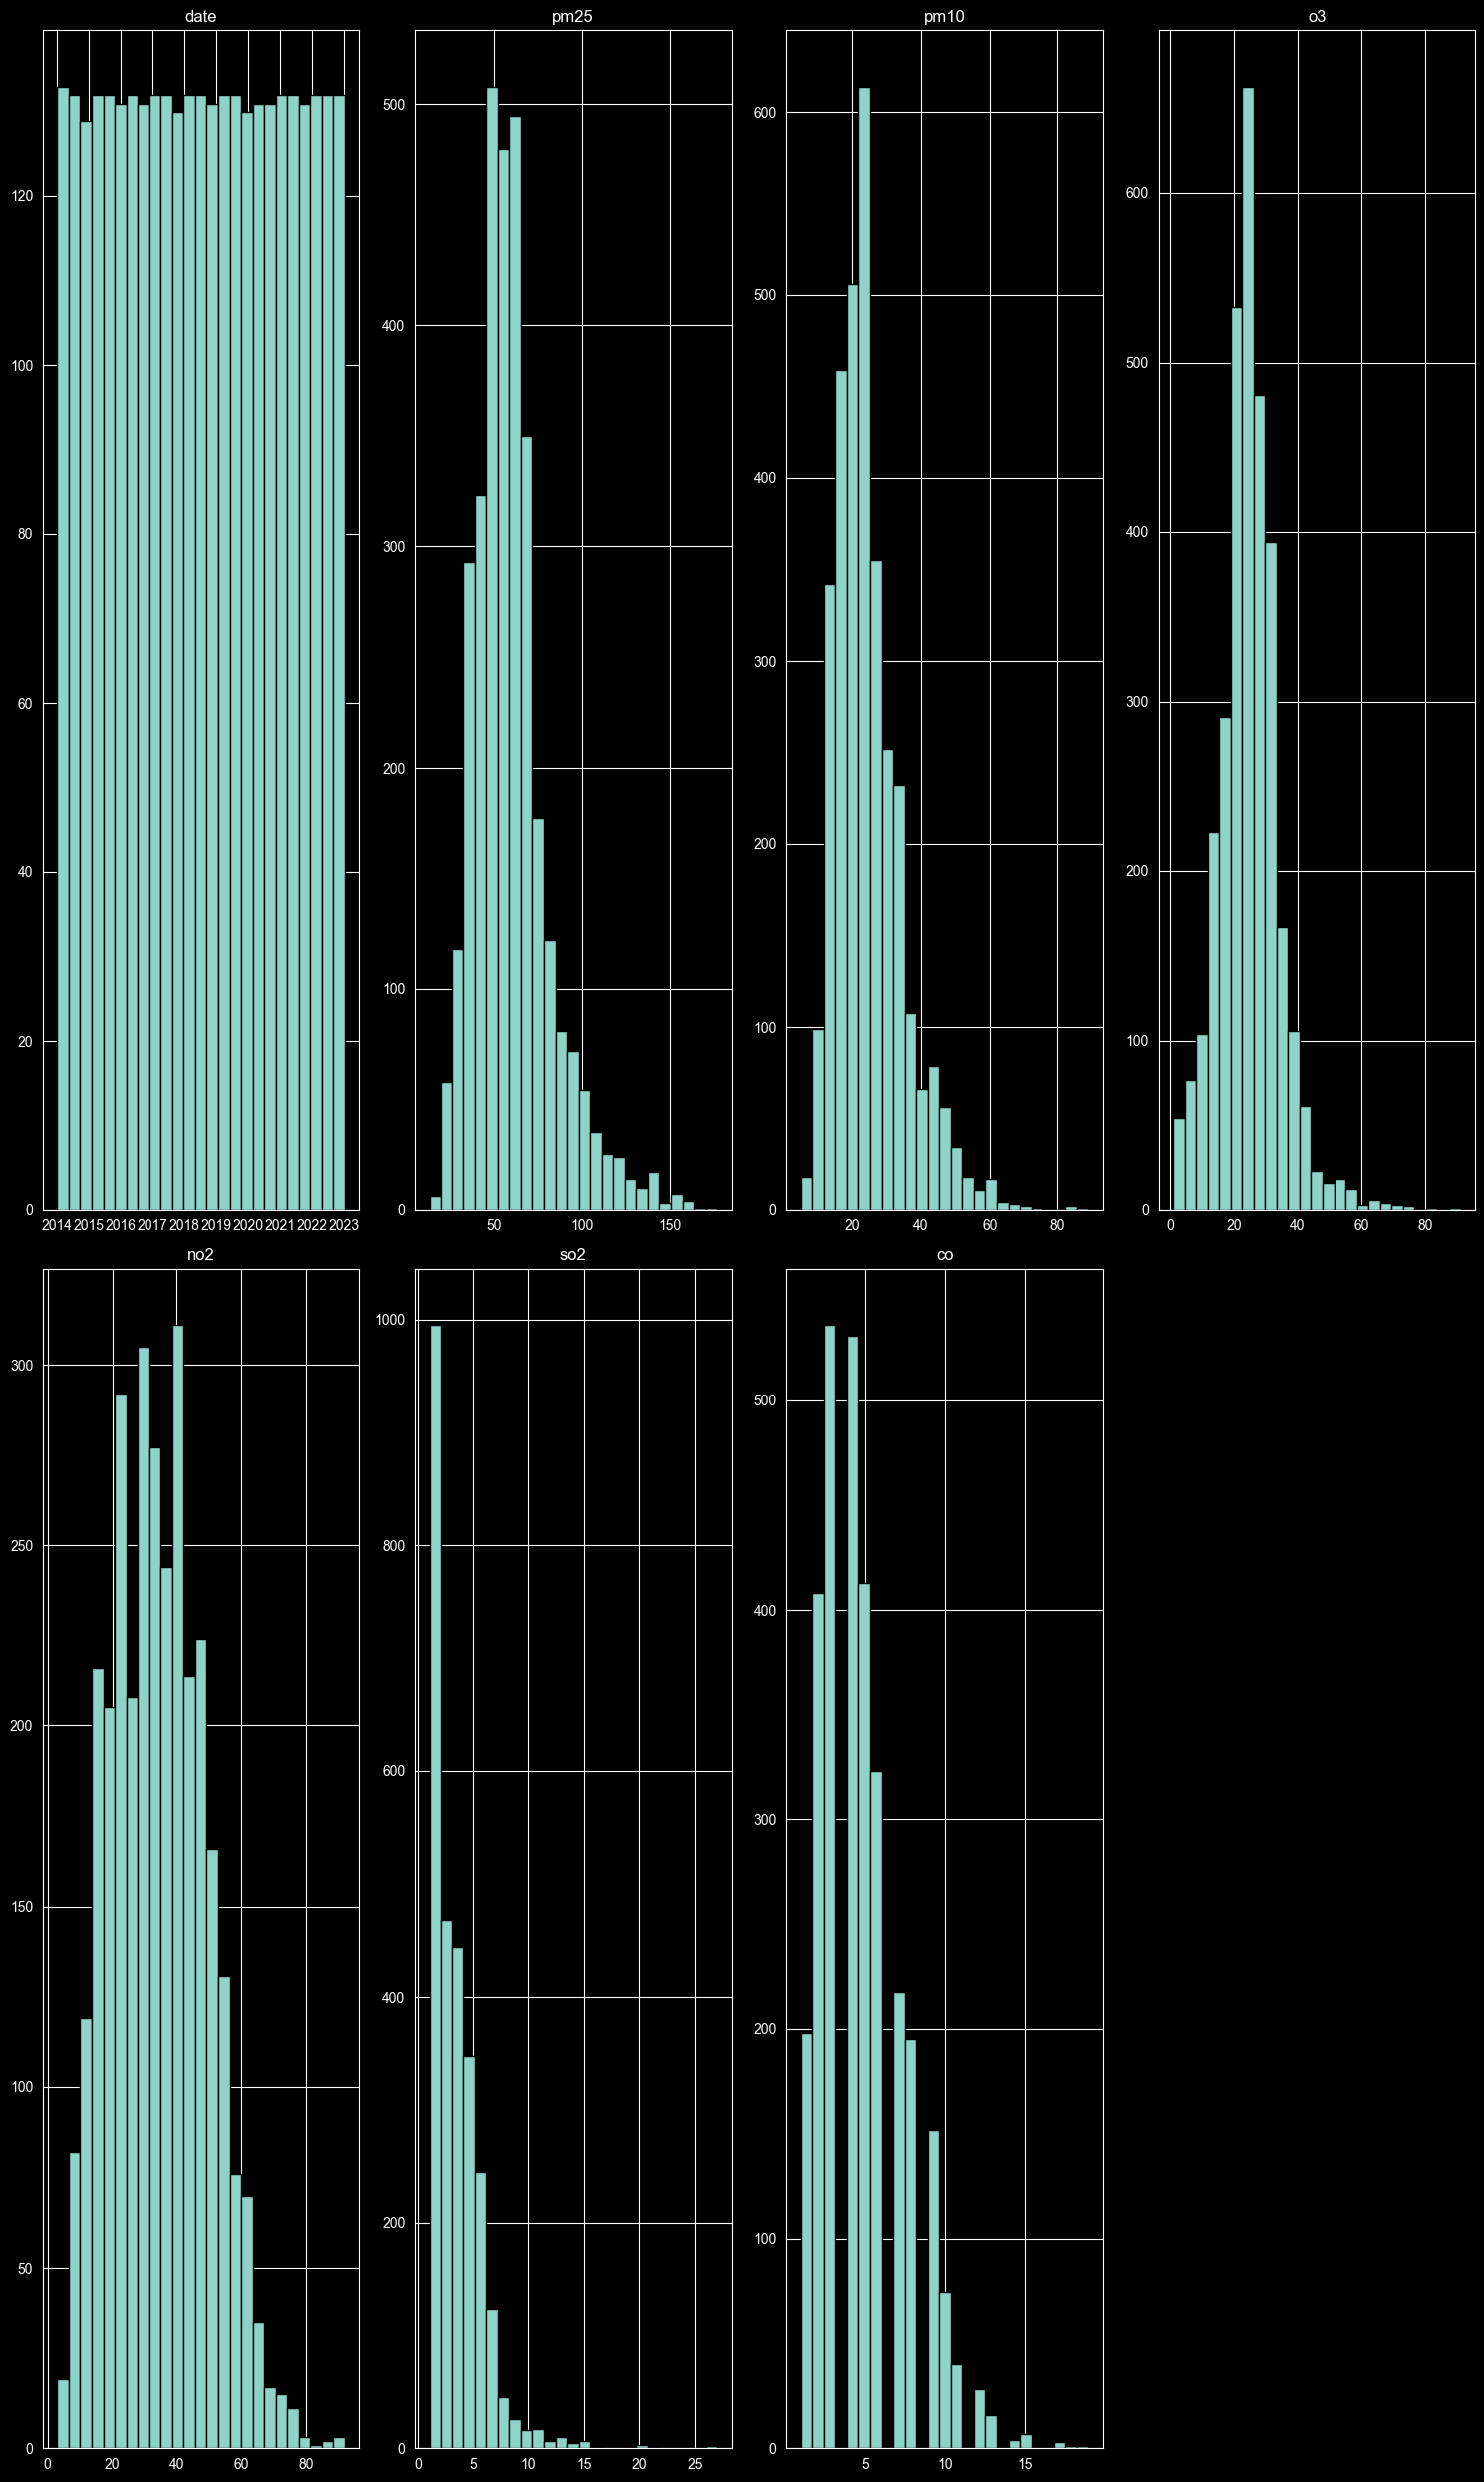

In [14]:
df.hist(bins=25, figsize=(15, 25), layout=(-1, 4), edgecolor="black")
plt.tight_layout();

From these 2 groups of plots we can conclude the following:
1. At first sight it does not appear to be significant outliers in any of the variables
2. The variable ***so2*** still is the one where the distribution looks bad (probably because of missing values)
3. All other distributions seem normal shapped - while almost of them are *left* skewed

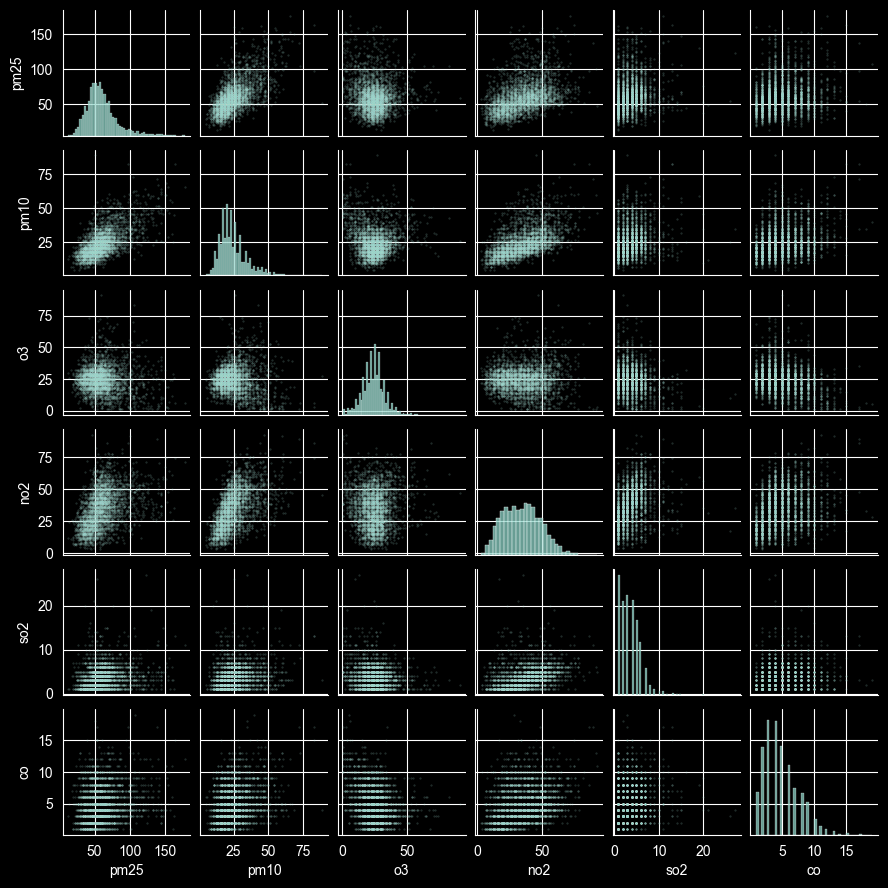

In [15]:
#check the pair plots to see if there is any evident relationship
sns.pairplot(df, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

C:\Users\J. Bastos\AppData\Local\Temp\ipykernel_824\3435465586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method="pearson")


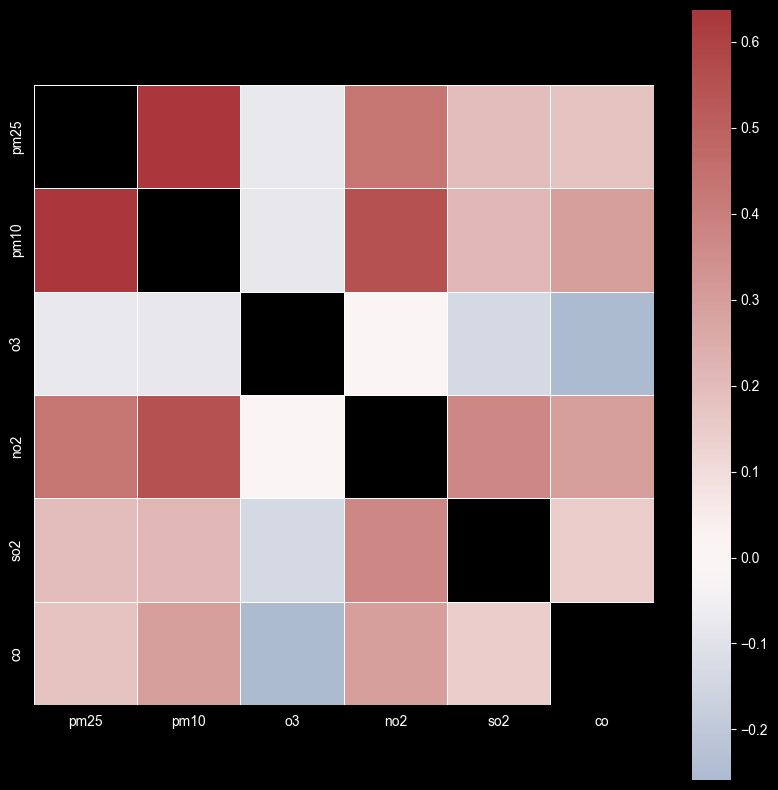

In [20]:
df_corr = df.corr(method="pearson")

# Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, fmt='', linewidths=.5,cmap="vlag");

We can see that the variables ***pm25***,***pm10***, and **no2*** are strongly correlated. The variables **co** and ***so2*** lightly correlated. While, the variable ***o3*** is inversely correlated with all other variables